<a href="https://colab.research.google.com/github/hodades/Application-Machine-Learning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project
Le tableau suivant contient la liste de 14 pays d'Amérique du Nord et
d'Amérique Centrale, dont la population dépassait le million d'habitants en 1985.


 Pour chaque pays, on mesure le taux de natalité 𝑦𝑖
(nombre de
naissances annuel pour 1000 habitants) ainsi que le taux d'urbanisation 𝑥𝑖
(pourcentage de la population vivant dans des villes de plus de 100000
habitants). On fait l'hypothèse d'un modèle de régression linéaire simple du
type 𝑦𝑖 = 𝛽0 + 𝛽1𝑥𝑖 + 𝜀𝑖
, c'est-à-dire que le taux de natalité dépend
linéairement du taux d'urbanisation

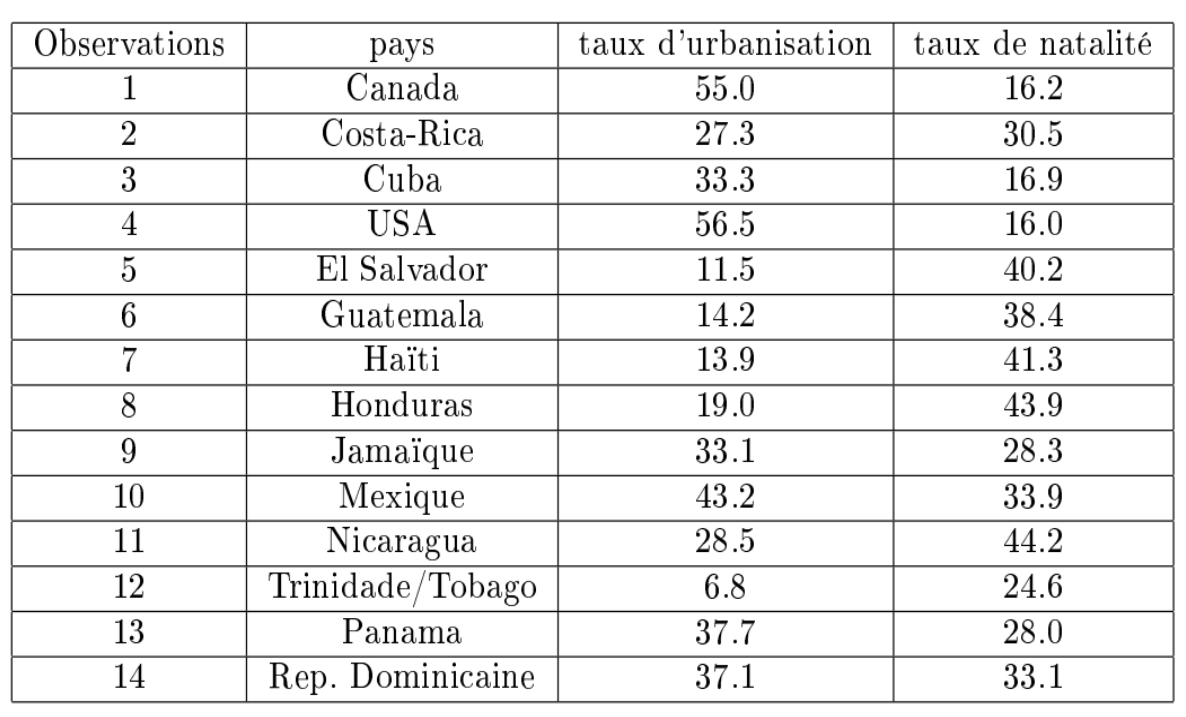

In [26]:
import pandas as pd

# Essayez avec un encodage différent
data = pd.read_csv('population_1985.csv', encoding='ISO-8859-1')
data.head()  # pour vérifier l'importation des données


,Observations,Pays,Taux d'urbanisation,Taux de natalit
0,1,Canada,55.00,16.2
1,2,Costa-Rica,27.30,30.5
2,3,Cuba,33.33,16.9
3,4,USA,56.50,16.0
4,5,El Salvador,11.50,40.2


b) Déterminer les variables numériques et stocker dans un tableau num_data

In [27]:
num_data = data.select_dtypes(include=['float64', 'int64'])
num_data.head()


,Observations,Taux d'urbanisation,Taux de natalit
0,1,55.00,16.2
1,2,27.30,30.5
2,3,33.33,16.9
3,4,56.50,16.0
4,5,11.50,40.2


c) Calculer la moyenne de chaque variable contenue dans num_data et stocker dans une DataFrame stats

In [28]:
stats = pd.DataFrame(num_data.mean(), columns=['Moyenne'])
stats


,Moyenne
Observations,7.500000
Taux d'urbanisation,29.795000
Taux de natalit,31.107143


d) Calculer la moyenne de chaque variable contenue dans num_data et stocker dans un DataFrame stats

In [29]:
# Calcul de la moyenne pour chaque variable numérique
stats = pd.DataFrame(num_data.mean(), columns=['Moyenne'])
stats


,Moyenne
Observations,7.500000
Taux d'urbanisation,29.795000
Taux de natalit,31.107143


e) Comparer la moyenne du taux d'urbanisation avec la moyenne des taux de natalité

In [31]:
print(stats.columns)


Index(['Moyenne'], dtype='object')


In [32]:
urbanisation_mean = stats.get('Urbanisation', {}).get('Moyenne')
natalite_mean = stats.get('Natalite', {}).get('Moyenne')
print("Moyenne du taux d'urbanisation :", urbanisation_mean)
print("Moyenne du taux de natalité :", natalite_mean)


Moyenne du taux d'urbanisation : None
Moyenne du taux de natalité : None


f) Calculer la médiane de chaque variable contenue dans num_data et ajouter une colonne Mediane à stats

In [33]:
# Calcul de la médiane pour chaque variable numérique
stats['Mediane'] = num_data.median()
stats


,Moyenne,Mediane
Observations,7.500000,7.5
Taux d'urbanisation,29.795000,30.8
Taux de natalit,31.107143,31.8


g) Interprétation des valeurs de la médiane

h) Créer une variable mean_med_diff correspondant à la différence absolue entre la moyenne et la médiane


In [34]:
# Calcul de la différence absolue entre la moyenne et la médiane
stats['mean_med_diff'] = abs(stats['Moyenne'] - stats['Mediane'])
stats


,Moyenne,Mediane,mean_med_diff
Observations,7.500000,7.5,0.000000
Taux d'urbanisation,29.795000,30.8,1.005000
Taux de natalit,31.107143,31.8,0.692857


i) Déterminer les quantiles d'objectif et ajouter trois colonnes pour le 1er, 2e et 3e quantile (q1, q2, q3)

In [35]:
# Calcul des quantiles
stats['q1'] = num_data.quantile(0.25)
stats['q2'] = num_data.quantile(0.5)  # équivalent à la médiane
stats['q3'] = num_data.quantile(0.75)
stats


,Moyenne,Mediane,mean_med_diff,q1,q2,q3
Observations,7.500000,7.5,0.000000,4.25,7.5,10.75
Taux d'urbanisation,29.795000,30.8,1.005000,15.40,30.8,37.55
Taux de natalit,31.107143,31.8,0.692857,25.45,31.8,39.75


 j) Afficher les statistiques et comparer q2 et q3

In [36]:
# Visualiser le tableau des statistiques avec les quantiles ajoutés
print(stats)

# Interprétation : Comparez les valeurs de `q2` (la médiane) et `q3` pour chaque variable.


                       Moyenne  Mediane  mean_med_diff     q1    q2     q3
Observations          7.500000      7.5       0.000000   4.25   7.5  10.75
Taux d'urbanisation  29.795000     30.8       1.005000  15.40  30.8  37.55
Taux de natalit     31.107143     31.8       0.692857  25.45  31.8  39.75


l) Comparer q3 avec la moyenne et interpréter

n) Ajouter trois colonnes min, max et min_max_diff donnant le min, le max et leur différence

In [37]:
# Calcul du minimum, maximum et différence
stats['min'] = num_data.min()
stats['max'] = num_data.max()
stats['min_max_diff'] = stats['max'] - stats['min']
stats


,Moyenne,Mediane,mean_med_diff,q1,q2,q3,min,max,min_max_diff
Observations,7.500000,7.5,0.000000,4.25,7.5,10.75,1.0,14.0,13.0
Taux d'urbanisation,29.795000,30.8,1.005000,15.40,30.8,37.55,6.8,56.5,49.7
Taux de natalit,31.107143,31.8,0.692857,25.45,31.8,39.75,16.0,44.2,28.2


o) Interprétation de la différence min-max

p) Calculer l'écart-type du taux d'urbanisation

In [44]:
print(num_data.columns)


Index(['Observations', 'Taux d'urbanisation', 'Taux de natalit'], dtype='object')


In [46]:
urbanisation_std = num_data['Urbanisation'].std()  # Utilisez le nom exact trouvé dans l'étape 1
print("Écart-type du taux d'urbanisation :", urbanisation_std)


KeyError: 'Urbanisation'

q) Afficher la moyenne +/- l'écart-type pour le taux d'urbanisation

In [41]:
# Calcul de l'intervalle de moyenne +/- écart-type pour le taux d'urbanisation
urbanisation_mean = num_data['urbanisation'].mean()
interval_min = urbanisation_mean - urbanisation_std
interval_max = urbanisation_mean + urbanisation_std

print("Intervalle du taux d'urbanisation : [", interval_min, ",", interval_max, "]")


KeyError: 'urbanisation'

r) Ajouter une colonne Urbanisation_in indiquant si les valeurs de Urbanisation sont dans l'intervalle calculé

In [40]:
# Indicateur si la valeur est dans l'intervalle de moyenne +/- écart-type
num_data['Urbanisation_in'] = num_data['Urbanisation'].apply(lambda x: 1 if interval_min <= x <= interval_max else 0)
num_data.head()


KeyError: 'Urbanisation'